## ABOUT :

### This dataset is a list of 500 consumer reviews for Amazon products like the Kindle, Fire TV Stick updated between September 2018 and October 2019. Each product listing includes the name Amazon in the Brand and Manufacturer field. This version is a sample of a large dataset.

### Exploratory Data Analysis is the process of exploring data, generating insights, testing hypotheses, checking assumptions and revealing underlying hidden patterns in the data.
### We need to perform investigative and detective analysis of our data to see if we can unearth any insights.

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import warnings
warnings. filterwarnings('ignore')

In [5]:
#read Consumer_Reviews_of_Amazon_Products.scv into a dataframe
import os
os.chdir('C:/Users/lenovo/Downloads/PROJECT- AMAZON PRODUCTS REVIEWS')
df_rev = pd.read_csv('Consumer_Reviews_of_Amazon_Products.csv')
df_rev.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


## Understanding the Problem Statement
The first step in any project is understanding the problem. So that’s what we’ll aim to do here. 

I’m a big fan of Amazon’s product lineup. Here, I have taken a dataset containing reviews of various products manufactured by Amazon, like Kindle, Fire TV, Echo, etc. The dataset has about 500+ rows, each containing review text, username, product name, rating, and other information for each product. Our objective is to use this data, explore it, and generate insights from it.

In [6]:
#Basic Understanding
df_rev.shape
#This will give the dimensions of the data we have gathered, 
#499 customers have given their reviews based on 24 different factors

(499, 24)

The dataset contains 500 rows and 21 columns. But we only need information such as product name, review text, user recommendation (binary), and the number of people that found a review helpful. Therefore, I am dropping other columns and reducing the dataset to only four columns, i.e., ‘name’, ‘reviews.text’, ‘reviews.doRecommend’, and ‘reviews.numHelpful’:

In [7]:
df_amz =df_rev[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of data =>",df_amz.shape)
df_amz.head(5)

Shape of data => (499, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,False,0
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,True,0
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,True,0
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,True,3
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,True,0


Before jumping to the exploration stage, we need to perform basic data pre-processing steps like null value imputation and removal of unwanted data.
Let’s see if there are any null values present in our dataset:

In [8]:
df_amz.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

There are a no null values in the dataset. So, we dont need to drop any null values and we can proceed further:

### The ‘reviews.doRecommend’ column contains values in the form of True-False and’ reviews.numHelpful’ contains floating-point numbers, which is not possible. Therefore, I am converting these columns into integers:

In [9]:
df_amz['reviews.doRecommend']=df_amz['reviews.doRecommend'].astype(int)
df_amz['reviews.numHelpful']=df_amz['reviews.numHelpful'].astype(int)

In [10]:
df_amz.dtypes

name                   object
reviews.text           object
reviews.doRecommend     int32
reviews.numHelpful      int32
dtype: object

That’s it! We are finished with the basic data-preprocessing part. Let’s move to the next section – cleaning text data.

## Cleaning Text Data in Python
Generally, text data contains a lot of noise either in the form of symbols or in the form of punctuations and stopwords. Therefore, it becomes necessary to clean the text, not just for making it more understandable but also for getting better insights.

#### Here, we have five columns in our dataset out of which two columns (‘name’, ‘reviews.text’,‘reviews.title’) contain textual data. So, let’s start with the ‘name’ column first and take a look at the text present in this column:

In [11]:
df_amz['name'].unique()

array(['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)',
       'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen'],
      dtype=object)

I dont find anything odd with this column, Now, it’s time to move on to the second column – reviews.text’. 
#### This column contains product reviews from different users, which are longer in length, and our complete analysis will be based on this data. Therefore, it becomes necessary to clean this thoroughly. The best way of determining data cleaning steps is by taking a look at some product reviews from the dataset:

In [12]:
for index,text in enumerate(df_amz['reviews.text'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 I lie the size and weight for the kindle-makes it very convenient to take large books with me in digital format.
Review 2:
 Great price and works great for book reading. Would recommend
Review 3:
 Got it when it was on sale. Totally fall in love with it. Bring with it me everywhere.
Review 4:
 I never used kindle before. My wife gifted me on my birthday. This is the amazing product. I am using it for daily reading. The display is fantastic and no strain on eyes.
Review 5:
 I bought this with paper white and didn‚Äôt see much of a difference in terms of resolution and use. I totally recommend this reader as it‚Äôs so small and powerful!


Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:

##### Lowercase the reviews
##### Remove digits and words containing digits
##### Remove punctuations

### Lowercase the reviews
In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the lower() function available in Python for converting text to lowercase:



In [13]:
df_amz['cleaned']=df_amz['reviews.text'].apply(lambda x: x.lower())

In [14]:
df_amz['cleaned']

0      i thought it would be as big as small paper bu...
1      this kindle is light and easy to use especiall...
2      didnt know how much i'd use a kindle so went f...
3      i am 100 happy with my purchase. i caught it o...
4      solid entry level kindle. great for kids. gift...
                             ...                        
494    great overall, would be nice to have parental ...
495    the sales associate was knowledgeable enough t...
496    i bought 2 shows and i am loving them. them vi...
497    enjoying alexa! there is so much you can ask h...
498    i love my echo show. it is easy to use and bei...
Name: cleaned, Length: 499, dtype: object

### Remove digits and words containing digits
Next, we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words. To do this, I am using regular expressions with lambda functions.

In [15]:
df_amz['cleaned']=df_amz['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df_amz['cleaned']

0      i thought it would be as big as small paper bu...
1      this kindle is light and easy to use especiall...
2      didnt know how much i'd use a kindle so went f...
3      i am  happy with my purchase. i caught it on s...
4      solid entry level kindle. great for kids. gift...
                             ...                        
494    great overall, would be nice to have parental ...
495    the sales associate was knowledgeable enough t...
496    i bought  shows and i am loving them. them vid...
497    enjoying alexa! there is so much you can ask h...
498    i love my echo show. it is easy to use and bei...
Name: cleaned, Length: 499, dtype: object

### Remove Punctuations
Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:

In [16]:
df_amz['cleaned']=df_amz['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df_amz['cleaned']

0      i thought it would be as big as small paper bu...
1      this kindle is light and easy to use especiall...
2      didnt know how much id use a kindle so went fo...
3      i am  happy with my purchase i caught it on sa...
4      solid entry level kindle great for kids gifted...
                             ...                        
494    great overall would be nice to have parental c...
495    the sales associate was knowledgeable enough t...
496    i bought  shows and i am loving them them vide...
497    enjoying alexa there is so much you can ask he...
498    i love my echo show it is easy to use and bein...
Name: cleaned, Length: 499, dtype: object

In [17]:
# Removing extra spaces
df_amz['cleaned']=df_amz['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [18]:
#Let’s how our text looks after cleaning:

for index,text in enumerate(df_amz['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)


Review 1:
 i lie the size and weight for the kindlemakes it very convenient to take large books with me in digital format
Review 2:
 great price and works great for book reading would recommend
Review 3:
 got it when it was on sale totally fall in love with it bring with it me everywhere
Review 4:
 i never used kindle before my wife gifted me on my birthday this is the amazing product i am using it for daily reading the display is fantastic and no strain on eyes
Review 5:
 i bought this with paper white and didn‚äôt see much of a difference in terms of resolution and use i totally recommend this reader as it‚äôs so small and powerful


### Great! We have cleaned the text data and are just one section away from the EDA stage!

#### Preparing Text Data for Exploratory Data Analysis (EDA)
We have already cleaned our data and have our corpus ready, but there are still some steps left to be done before EDA. In this section, we’ll create a Document Term Matrix that we’ll later use in our analysis.

Now, you might be wondering what is a Document Term Matrix and why do we have to create one?

A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews. It helps in analyzing the occurrence of words in different documents in a corpus. 

### In this section, we’ll do the following things:
#### Stopwords Removal :
Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.
#### Lemmatization : 
Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form.
#### Create Document Term Matrix :
A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews.

In [19]:
# IMPORTING SPACY FOR
#We’ll use SpaCy for the removal of stopwords and lemmatization. 
#It is a library for advanced Natural Language Processing in Python and Cython.
#import sys
#!{sys.executable} -m pip install -U spacy

In [20]:
#import sys
#!{sys.executable} -m spacy download en_core_web_sm

In [21]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [22]:
# Lemmatization with stopwords removal
df_amz['lemmatized']=df_amz['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

We have removed stopwords and lemmatized our reviews successfully. Let’s group them according to the products:

In [23]:
df_grouped=df_amz[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
name,
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",great gift easy setup coexist iot device alexa...
"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",think big small paper turn like palm think sma...


In [24]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
data= vect.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=vect.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,ability,able,absent,absolute,absolutely,ac,access,accessory,accommodate,accompany,...,äôll,äôm,äôre,äôs,äôt,äôve,äù,äúdroppe,äúshow,äústar
name,,,,,,,,,,,,,,,,,,,,,
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",3,25,1,1,3,1,2,2,1,1,...,1,8,4,28,17,4,3,1,1,1
"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",1,5,0,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


Finally, we have completed all the procedures required before starting our analysis, and we have our dataset present in the exact format needed for the exploration stage.

## Exploratory Data Analysis on Amazon Product Reviews 

So, let’s start by looking at the common words present in the reviews for each product. For this, I will use the document term matrix created earlier with word clouds for plotting these words. Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

Word clouds can be generated using the wordcloud library. So, let’s plot word clouds for each product:

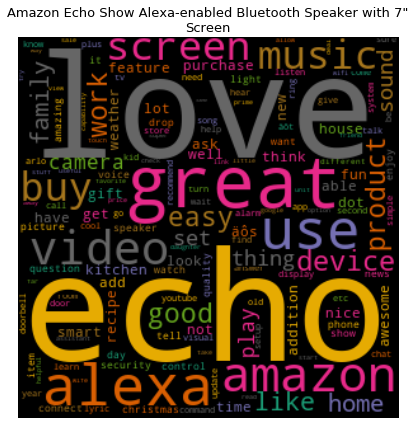

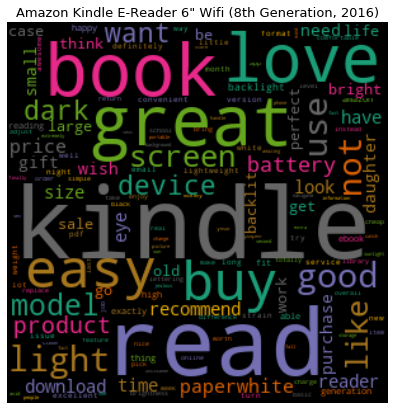

In [25]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
# For visualizations
import matplotlib.pyplot as plt

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=300, height=300, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(9,7))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

### Here, we can see that LOVE, USE, BUY, GREAT, BOOK, GOOD, WANT, LIKE, and EASY are the most frequently occurring words for almost every product. This means that users are loving products from Amazon and found purchasing them a great decision. They also found them easy to use.

## Now, let’s say Amazon wants to dig deeper into this and wants to know which products they should improve. We can find the answer to this question by doing a sentiment analysis of the reviews for each product. Sentiment analysis is the analysis of how much a piece of text is positive and opinionated.

### Here, in this case, checking only the polarity, i.e., how much a text is positive or negative, is sufficient. We can check the polarity of a review using the TextBlob library in Python:

In [26]:
from textblob import TextBlob
df_amz['polarity']=df_amz['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [27]:
#Let’s take a look at some of the most positive and negative reviews from the customers:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df_amz.iloc[df_amz['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 The video screen really adds wonderfully to the functionality of the echo devices.
Review 2:
 It has been wonderful. I bought it for my boyfriend but I get more use out of it then he does
Review 3:
 Got one for my mom in order to video chat with her. Works awesome.


In [28]:
#Let’s take a look at some of the most positive and negative reviews from the customers:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df_amz.iloc[df_amz['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 I've wanted a kindle for a while and decided to get it when BB put it on sale. I am not disappointed.
Review 2:
 I have to say it was a little confusing and frustrating when i was not getting the verification code from amazon , i waited for 20 minutes then i requested another code, nothing... then a nother one... and still nothing , i started to set up the device at 8.30 am and by 11.20 am i was fed up with it.. i had to step away.... after about 5 hours we went shopping and at the mall i recieved about 4 codes from amazon ....
Review 3:
 it is smaller than i thought but it gets the job done.


### Let’s plot polarities of reviews for each product and compare them.

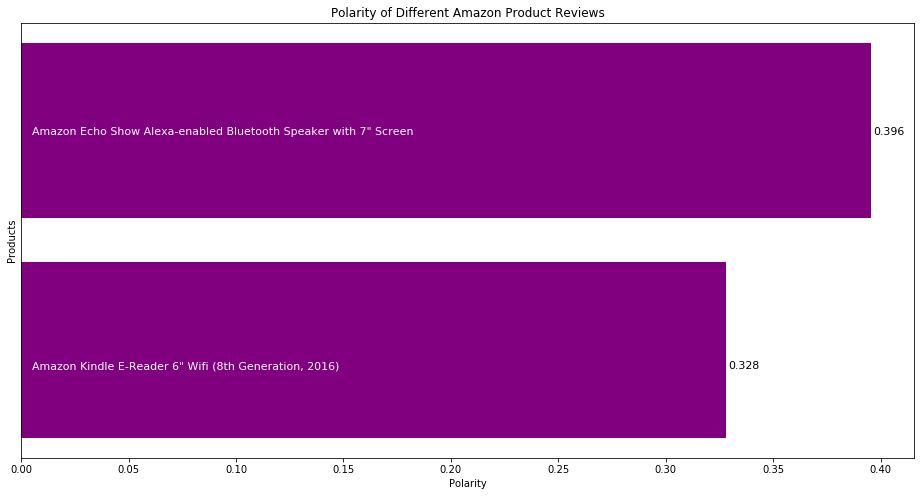

In [29]:
product_polarity_sorted=pd.DataFrame(df_amz.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

### You can see that according to the polarity of reviews, Amazon needs to improve Amazon Kindle E-Reader 6" Wifi as compared to Amazon Echo Show Alexa.

Let’s also take a look at the number of reviewers who recommended a particular product. For this, we can take the percentage of reviewers and plot that:

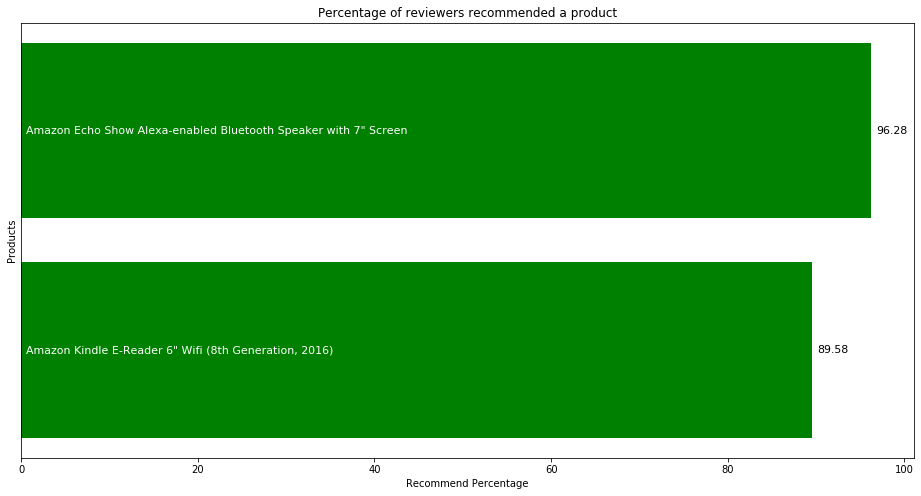

In [30]:
recommend_percentage=pd.DataFrame(((df_amz.groupby('name')['reviews.doRecommend'].sum()*100)/df_amz.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()


### Here, we can see that the Amazon Kindle E-Reader 6" Wifi has the lowest recommendation percentage. It’s reviews also have the lowest polarity. So, we can say that the polarity of reviews affects the chances of a product getting recommended.

Still, we cannot tell the difference in the readability of the two. The textstat library has a solution for this as well. It provides the text_standard() function. that uses various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completely.

In [31]:
#!pip install textstat
#from textstat import textstat

df_amz['text_standard']=df_amz['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',df_amz[df_amz['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df_amz[df_amz['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvoted reviews=> 0    5th and 6th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


Interesting. Both upvoted and not upvoted reviews are easily understandable by anyone who has completed the 5th or 6th grade in school.

## Let’s take a look at the reading time of reviews upvoted as helpful and non-helpful. An average adult reads about 250 words per minute.

In [32]:
df_amz['reading_time']=df_amz['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews=>',df_amz[df_amz['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df_amz[df_amz['reviews.numHelpful']<=1]['reading_time'].mean())


Reading Time of upvoted reviews=> 6.104444444444444
Reading Time of not upvoted reviews=> 2.0403118503118507


### Surprisingly, the reading time of upvoted reviews is thrice that of not upvoted reviews. It means that people usually find longer reviews helpful.

# Conclusion from the EDA on Text Data

### 1. Customers love products from Amazon. They find them a great purchase and easy to use
### 2. Amazon needs to work on the Amazon Kindle E-Reader 6" Wifi because it has the most negative reviews. It is also the least recommended product
### 3. The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school
### 4. The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful